
# QBITS Basic Utility

##  Session 5_2 Redundancy as Error Detection - Voting Compass

### UDL + 5E Model — Duration: 2 hours

---

## 1 Engage — Connect with Experience

> “You prepare a qubit in a known direction.  
> But noise slightly rotates it — again.  
> This time, instead of trusting a single compass, you build **three identical ones**, all prepared in the same way.”

> “After a while, one compass drifts…  
> but the other two still point in nearly the same direction.”

> **Which direction should you trust?**

This simple question introduces a powerful idea:
> *A group can be more reliable than an individual.*

**Guiding Questions:**
- If one qubit is affected by noise, how can we tell?
- What if the noise affects only one qubit at a time?
- Can multiple qubits help us *infer* the correct state?

**Brief Activity (Physical Analogy):**
- Draw **three identical arrows** on the board, all pointing in the same direction.
- Slightly rotate **only one** of them.
- Ask:
> “If these arrows represent measurements, what is the most reasonable conclusion?”

**Physical Concept:**  
Redundancy allows systems to **detect inconsistency**.  
In quantum systems, this idea becomes the foundation of **error detection by majority voting**.

**Learning Objective:**  
Understand why copying information across multiple qubits can improve reliability, even before formal error correction is introduced.


## 2 Explore — Exploring Redundancy Without Code

At this stage, we avoid Python and focus on **representation and intuition**.

### Board Representation (Recommended)
1. Draw a **single Bloch sphere** and place an ideal state on it.
2. Next to it, draw **three identical spheres** labeled:
   - Qubit A
   - Qubit B
   - Qubit C
3. Mark all three at the same initial angle $ \theta $.

Now introduce noise:
- Rotate **only one sphere** slightly.
- Leave the other two unchanged.

Ask participants:
- Which orientation is most likely to represent the original state?
- How confident are you compared to using only one sphere?

---

### Voting Analogy (Classroom-Friendly)
- Each qubit represents a **vote** for a direction.
- Noise is a **mistaken vote**.
- The system decision is the **majority orientation**.

> Even without measuring, we can already *reason* about reliability.

---

### Conceptual Bridge to Quantum Systems
At this stage, emphasize:
- We are **not cloning** an unknown quantum state.
- We are preparing **three qubits in the same known state**.
- The redundancy is classical in spirit, but implemented with quantum states.

This distinction is crucial and prepares the ground for the **no-cloning theorem** later.

---

### Teaching Strategy
>  Ask to the students:
> - What assumptions are we making about the noise?
> - What breaks if two qubits are affected at once?
> - Why might this strategy fail for unknown states?

>These questions naturally lead to the need for:
- Ancilla qubits
- Syndrome extraction
- True quantum error correction (Notebook 5_3)


## 3 Explain — Redundancy as a Quantum Model (3 Qubits)

In Session 1, we modeled error as a **small unwanted rotation** on a single qubit.  
Now we extend that idea:

> Instead of asking *“How accurate is one qubit?”*  
> we ask *“What do several qubits tell us together?”*

---

### 3.1 Single-Qubit Reminder: Rotation as Error

A qubit prepared in the state

$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right)|1\rangle
$$

has a probability of measuring \(|1\rangle\):

$$
P(1) = \sin^2\left(\frac{\theta}{2}\right)
$$

Noise can be modeled as an **additional rotation**:

$$
\theta \longrightarrow \theta + \varepsilon
$$

This changes the measurement probability slightly, even if the original state was well defined.

---

### 3.2 Extending the State: Three Identical Qubits

Now suppose we prepare **three qubits**, all in the same known state:

$$
|\psi\rangle \otimes |\psi\rangle \otimes |\psi\rangle
$$

This is called a **product state** — there is no entanglement yet.

Each qubit independently represents the same physical orientation, just like three compasses aligned in the same direction.

---

### 3.3 Independent Noise Assumption

We assume:
- Noise acts **independently** on each qubit.
- At most **one qubit** is significantly affected at a time.

This is a *pedagogical* and *physical* simplification, but a very useful one.

Under this assumption:
- Two qubits remain close to the correct angle.
- One qubit may rotate away.

---

### 3.4 Measurement and Voting Logic

When we measure the three qubits in the computational basis:
- Each qubit produces a classical outcome (0 or 1).
- The full system produces a 3-bit string (e.g., 001, 101, 111).

Instead of trusting a single outcome, we apply a **majority vote**:

| Measurement Result | Interpretation |
|-------------------|----------------|
| 000 | All agree → strong confidence |
| 001, 010, 100 | One error → majority wins |
| 011, 101, 110 | Still a majority |
| 111 | Consistent but possibly rotated |

The key idea:
> **Consistency across qubits increases confidence**, even when noise is present.

---

### 3.5 Key Conceptual Meaning (Important)

This is **not yet quantum error correction**.

At this stage:
- We are detecting *disagreement*, not correcting amplitudes.
- The redundancy helps statistically, not perfectly.
- We rely on classical post-processing (voting).

This mirrors early error-handling strategies in both classical and quantum systems.

---

### 3.6 Board-Based Teaching Prompt

> Ask teachers to draw three Bloch spheres and rotate only one.  
> Then ask:
> - Which state would you trust?
> - Why does agreement matter more than precision?

This discussion prepares students for:
- Ancilla-based syndrome extraction
- True quantum correction
- The limits of redundancy alone

---

### 3.7 Bridge to the Next Session

Redundancy answers **“Which result is most likely?”**  
But it does not explain **why** a qubit failed.

To go further, we need:
- Extra qubits that do not carry information
- Controlled interactions
- A way to *diagnose* errors without measuring the state

That is the role of **ancilla qubits** — the focus of Notebook 3_5.


## 4 Elaborate — Redundancy in Action: Three Qubits under Rotation Noise

In this section, teachers implement a **redundant encoding** using three qubits, all prepared in the same state.  
Noise will be introduced as a **small unwanted rotation**, and the effect of redundancy will be analyzed through measurement statistics.

---

### 4.1 Objective of the Experiment

- Encode the same quantum state into **three independent qubits**
- Introduce a rotation error on **one qubit only**
- Compare measurement outcomes
- Observe how **majority voting** stabilizes the result

This models the simplest idea behind error mitigation.

---

### 4.2 Step 1 — Define the Ideal State

We begin with a target rotation angle \(\theta\), representing the desired state orientation.

```python
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

theta = 1.1              # ideal rotation angle
epsilon = 0.4            # error rotation (noise)
shots = 2048

sim = AerSimulator()


In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

theta = 1.1              # ideal rotation angle
epsilon = 0.4            # error rotation (noise)
shots = 2048

sim = AerSimulator()

### 4.3 Step 2 — Build the Ideal Redundant Circuit (No Error)

All three qubits are prepared with the same rotation.

```python
qc_ideal = QuantumCircuit(3, 3)

qc_ideal.ry(theta, 0)
qc_ideal.ry(theta, 1)
qc_ideal.ry(theta, 2)

qc_ideal.barrier()
qc_ideal.measure([0,1,2], [0,1,2])


In [8]:
qc_ideal = QuantumCircuit(3, 3)

qc_ideal.ry(theta, 0)
qc_ideal.ry(theta, 1)
qc_ideal.ry(theta, 2)

qc_ideal.barrier()
qc_ideal.measure([0,1,2], [0,1,2])
print(qc_ideal)

     ┌─────────┐ ░ ┌─┐      
q_0: ┤ Ry(1.1) ├─░─┤M├──────
     ├─────────┤ ░ └╥┘┌─┐   
q_1: ┤ Ry(1.1) ├─░──╫─┤M├───
     ├─────────┤ ░  ║ └╥┘┌─┐
q_2: ┤ Ry(1.1) ├─░──╫──╫─┤M├
     └─────────┘ ░  ║  ║ └╥┘
c: 3/═══════════════╩══╩══╩═
                    0  1  2 


### 4.4 Step 3 — Build the Noisy Circuit (Single-Qubit Error)

Now we introduce noise as an extra rotation on only one qubit.

```python
qc_error = QuantumCircuit(3, 3)

qc_error.ry(theta, 0)
qc_error.ry(theta, 1)
qc_error.ry(theta + epsilon, 2)   # error on qubit 2

qc_error.barrier()
qc_error.measure([0,1,2], [0,1,2])


In [9]:
qc_error = QuantumCircuit(3, 3)

qc_error.ry(theta, 0)
qc_error.ry(theta, 1)
qc_error.ry(theta + epsilon, 2)   # error on qubit 2

qc_error.barrier()
qc_error.measure([0,1,2], [0,1,2])
print(qc_error)


     ┌─────────┐ ░ ┌─┐      
q_0: ┤ Ry(1.1) ├─░─┤M├──────
     ├─────────┤ ░ └╥┘┌─┐   
q_1: ┤ Ry(1.1) ├─░──╫─┤M├───
     ├─────────┤ ░  ║ └╥┘┌─┐
q_2: ┤ Ry(1.5) ├─░──╫──╫─┤M├
     └─────────┘ ░  ║  ║ └╥┘
c: 3/═══════════════╩══╩══╩═
                    0  1  2 


### 4.5 Step 4 — Simulate Both Circuits

```python
qc_ideal_t = transpile(qc_ideal, sim)
qc_error_t = transpile(qc_error, sim)

result_ideal = sim.run(qc_ideal_t, shots=shots).result()
result_error = sim.run(qc_error_t, shots=shots).result()

counts_ideal = result_ideal.get_counts()
counts_error = result_error.get_counts()

print("Ideal counts:", counts_ideal)
print("Noisy counts:", counts_error)


In [ ]:
qc_ideal_t = transpile(qc_ideal, sim)
qc_error_t = transpile(qc_error, sim)

result_ideal = sim.run(qc_ideal_t, shots=shots).result()
result_error = sim.run(qc_error_t, shots=shots).result()

counts_ideal = result_ideal.get_counts()
counts_error = result_error.get_counts()

print("Ideal counts:", counts_ideal)
print("Noisy counts:", counts_error)

Ideal counts: {'000': 775, '110': 121, '001': 283, '010': 284, '111': 36, '100': 305, '011': 120, '101': 124}
Noisy counts: {'110': 208, '000': 564, '010': 213, '001': 204, '101': 198, '111': 87, '100': 494, '011': 80}


### 4.6 Step 5 — Visual Comparison of Measurement Outcomes

```python
from qiskit.visualization import plot_histogram

plot_histogram(
    [counts_ideal, counts_error],
    legend=['Ideal (no error)', 'With rotation error'],
    title='Redundant Encoding: Measurement Outcomes'
)



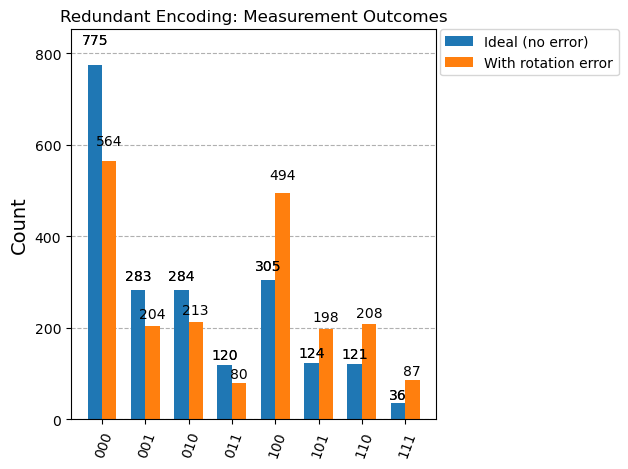

In [7]:
from qiskit.visualization import plot_histogram

plot_histogram(
    [counts_ideal, counts_error],
    legend=['Ideal (no error)', 'With rotation error'],
    title='Redundant Encoding: Measurement Outcomes'
)

## 5 Evaluate — From instability to redundancy

After running the experiment and collecting the measurement results,
focus on interpreting the bitstrings — not on modifying the circuit.

### Guiding Questions

- Inspect the measured outcomes.
  Which value (0 or 1) appears most frequently?

- If several measurements tend to agree while a few differ,
  which result would you trust more?

- Compare this situation with a single qubit measurement:
  - Does repetition reduce ambiguity?
  - Does it increase confidence in the outcome?

### Conceptual Discussion

- Each measurement may be affected by a small, independent error.
- When the same information is observed multiple times,
  patterns begin to emerge.
- Agreement among results suggests a more stable decision.

> **Emphasize to the teachers:**  
> At this stage, we are not correcting amplitudes or phases.  
> We are only learning how **decisions become more stable** when information is repeated.

### Key Pedagogical Message

> Noise is not eliminated.  
> Its impact on decisions is reduced.
